# Introducción a _ggplot-plotnine_

## 1. Representa con _ggplot_ o _plotnine_ los datos del cuarteto de ascombe

In [13]:
import pandas as pd
from plotnine import (
    ggplot,
    geom_point,
    aes,
)

df = pd.read_csv('../data/anscombe.csv').drop('Unnamed: 0', axis=1)

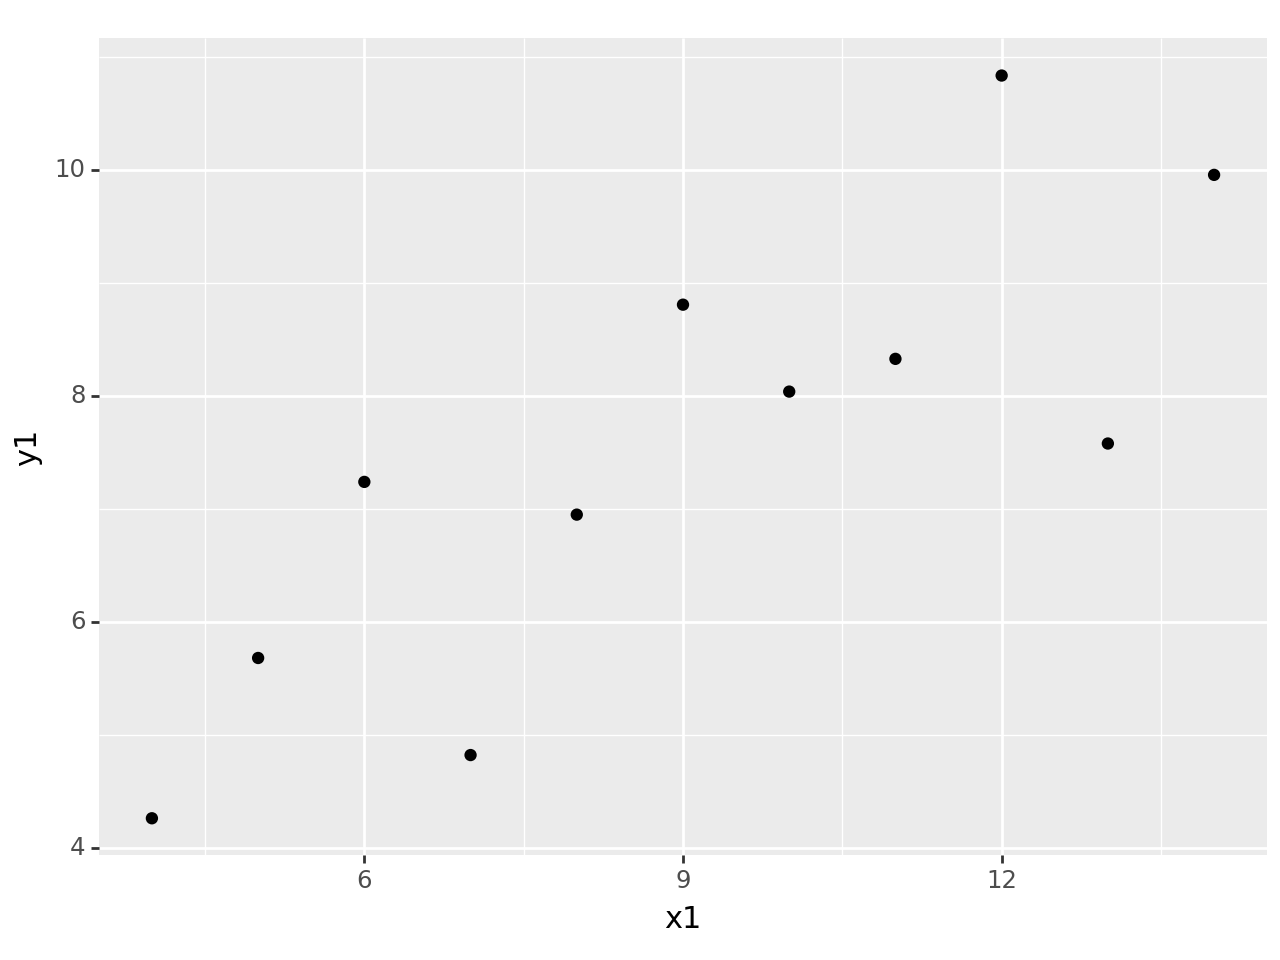

<Figure Size: (640 x 480)>

In [16]:
ggplot(aes('x1', 'y1'), df) + geom_point()

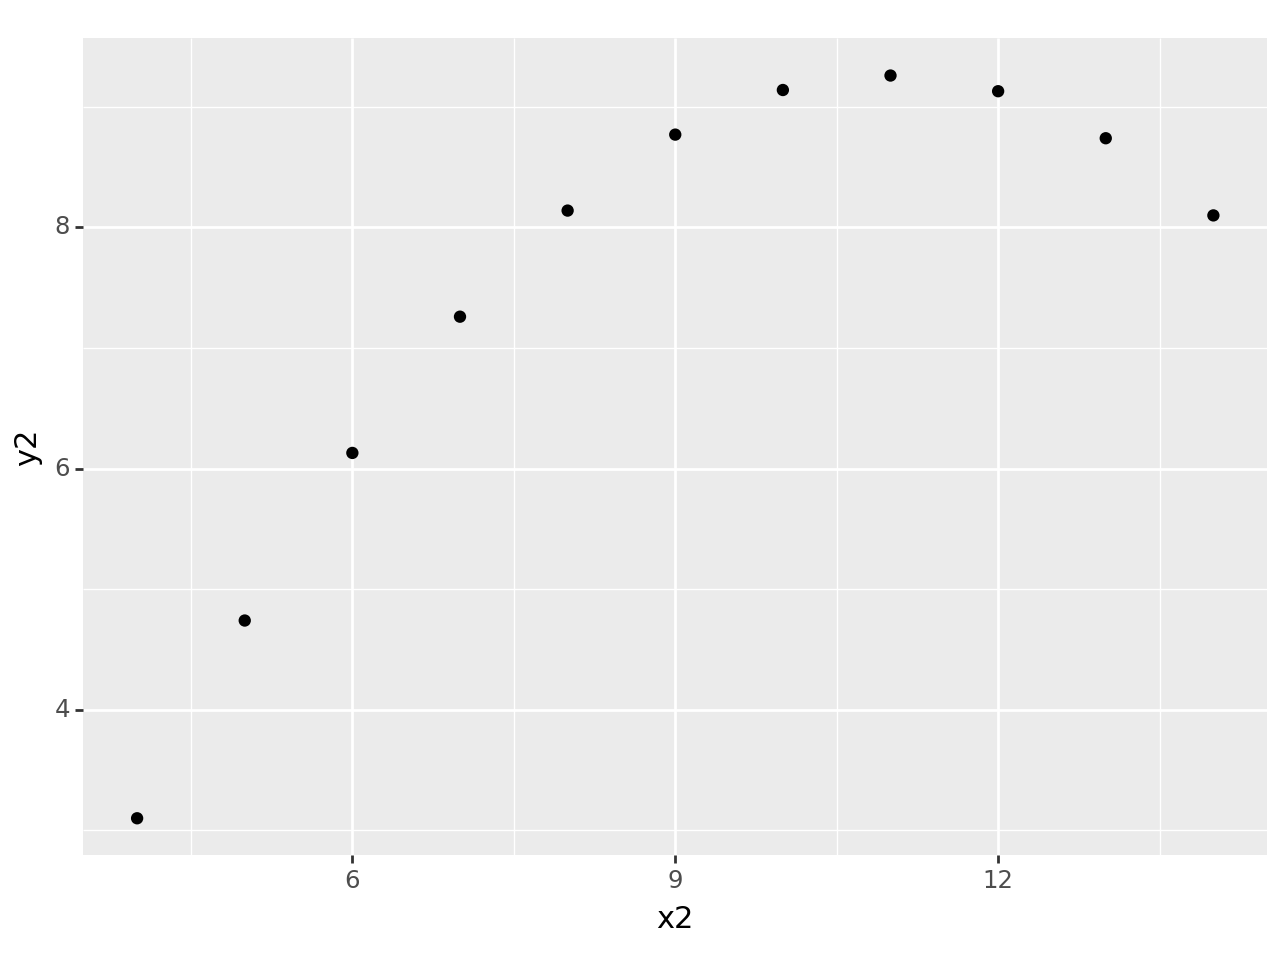

<Figure Size: (640 x 480)>

In [17]:
ggplot(aes('x2', 'y2'), df) + geom_point()

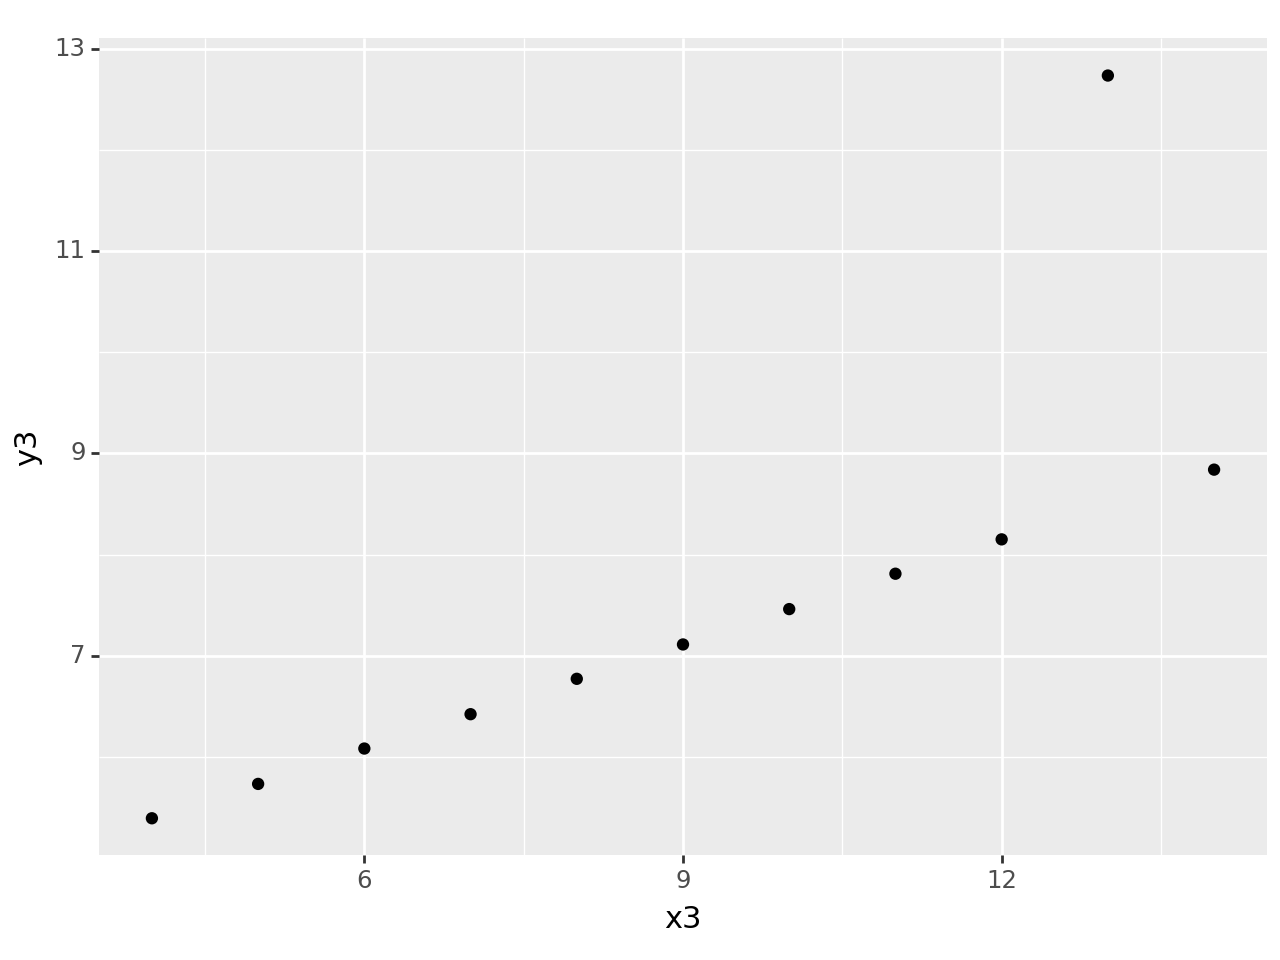

<Figure Size: (640 x 480)>

In [18]:
ggplot(aes('x3', 'y3'), df) + geom_point()

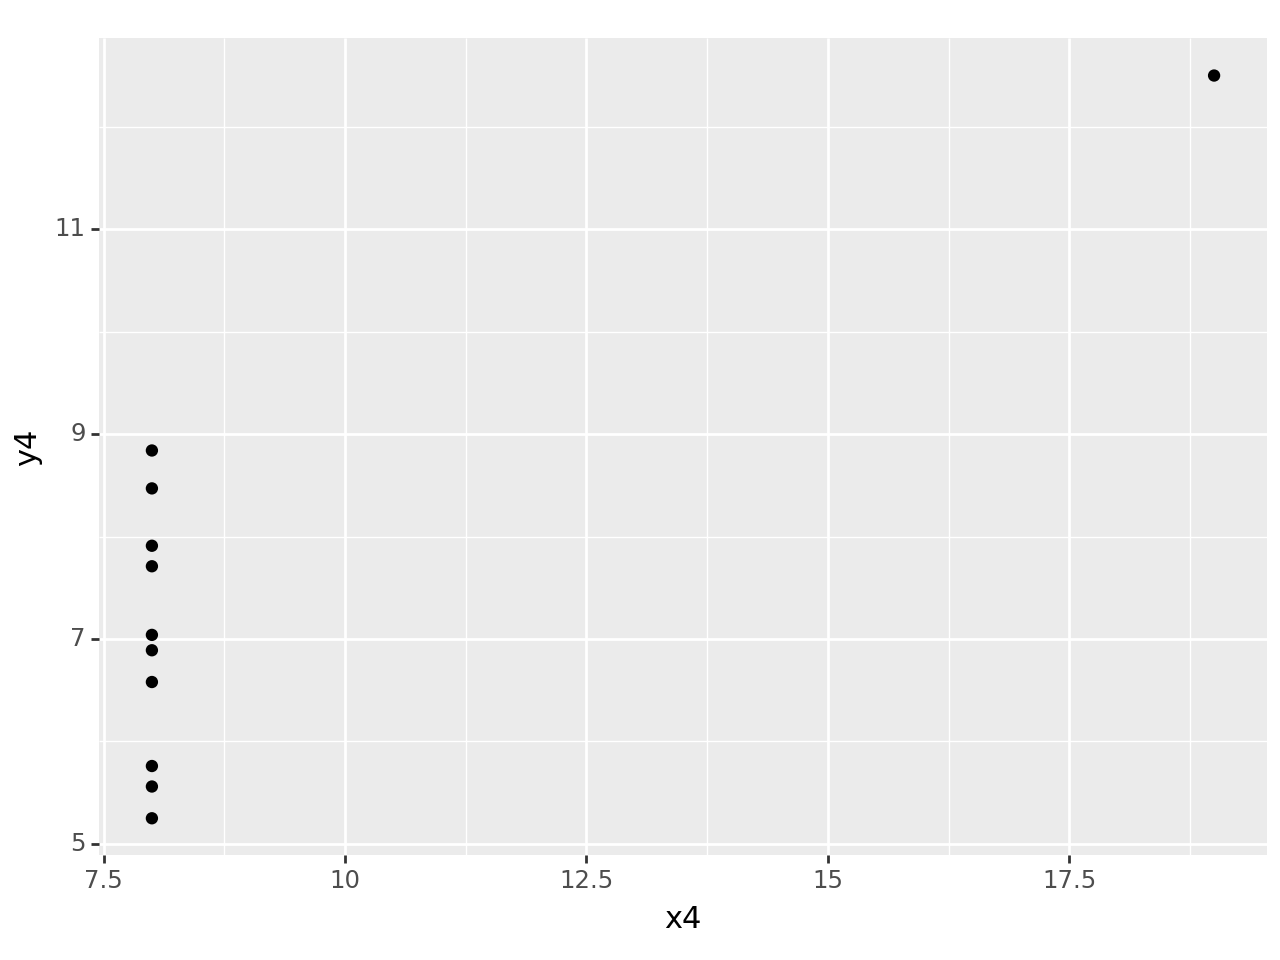

<Figure Size: (640 x 480)>

In [19]:
ggplot(aes('x4', 'y4'), df) + geom_point()

## 2. Prepara el fichero de causa de muerte para realizar gráficos utilizando el menor número posible de bucles

In [89]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

display(df)

df.columns = [['2021','2021','2021'], ['A', 'A', 'B'], ['A', 'B', 'C']]

display(df)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


2021      
     A     B
     A  B  C
0    1  2  3
1    4  5  6
2    7  8  9

## 3. Utilizar la librería _ggplot_ o su equivalente _plotnine_ para realizar los siguientes gráficos sobre las causas de muerte en Canarias. Indica si encuentras alguna propuesta que no recomiendes utilizar, en cuyo caso presenta una alternativa más adecuada

### Gráfico de dispersión de defunciones cada año

### Gráfico de defunciones en el municipio de Arucas cada año 

### Gráfico de barras del total de defunciones cada año

### Gráfico de barras apiladas por cada causa de defunción al año

### Gráfico de burbujas en cada municipio por causa de defunción del año 2018 al 2021